## Imports

In [19]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

Make sure that this Notebook is in the same directory as a folder called DS-71c1fd51-v2 that has the images and the labels !

### Visualize annotations on sample images

In [20]:

def get_label_path_from_img_path(p,mode):
    label_prefix = 'DS-71c1fd51-v2/labels/'
    return label_prefix +f"{mode}/" + p.split('/')[-1].replace('.jpg', '.txt')

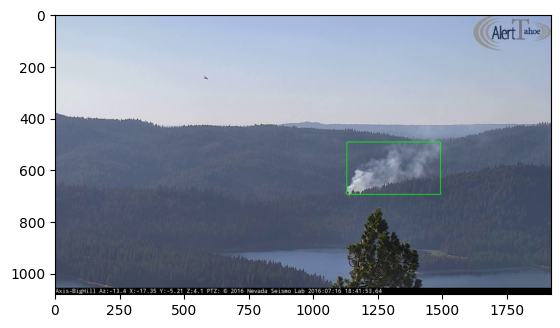

In [21]:
def image_with_bboxes(img_path,mode,display=True):
    #given a path like pathname.jpg, read the image and display it with bounding boxes
    sample_img = cv2.imread(img_path)
    label_path = get_label_path_from_img_path(img_path,mode)
    smoke_bboxes = []
    with open(label_path, 'r') as f:
        for line in f:
            line = line.replace('\n', '')
            class_id, x, y, w, h = line.split(' ')
            x, y, w, h = float(x), float(y), float(w), float(h)
            x, y = int(x * sample_img.shape[1]), int(y * sample_img.shape[0])
            w, h = int(w * sample_img.shape[1]), int(h * sample_img.shape[0])
            smoke_bboxes.append((x, y, w, h))
    for x, y, w, h in smoke_bboxes:
        half_w, half_h = w//2, h//2
        cv2.rectangle(sample_img, (x-half_w, y-half_h), (x+half_w, y+half_h), (0, 255, 0), 2)
    
    if display:
        plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
        plt.show()
    return sample_img

image_with_bboxes('/home/bpopper/codePerso/hi_paris/DS-71c1fd51-v2/images/train/vid_0071_frame_001050.jpg',mode='train')
print()

## Images without labels

We consider that there are no missing labels, any such image is just an image where the groud truth is that there is no smoke

In [22]:
def list_missing_labels(base_path,mode):

    #base path is DS-71c1fd51-v2/labels/train or DS-71c1fd51-v2/labels/val

    all_img_paths = [base_path + img for img in os.listdir(base_path)]
    missing_labels = []
    for img_path in all_img_paths:
        label_path = get_label_path_from_img_path(img_path,mode)
        if not os.path.exists(label_path):
            missing_labels.append(img_path.split('/')[-1])
    return missing_labels

missing_labels_train = list_missing_labels('DS-71c1fd51-v2/images/train/',mode='train')
missing_labels_val = list_missing_labels('DS-71c1fd51-v2/images/val/',mode='val')

print(f"total number of train images: {len(os.listdir('DS-71c1fd51-v2/images/train/'))}, but only {len(os.listdir('DS-71c1fd51-v2/labels/train/'))} labels")
print(f"total number of val images: {len(os.listdir('DS-71c1fd51-v2/images/val/'))}, but only {len(os.listdir('DS-71c1fd51-v2/labels/val/'))} labels")

ALL_VALID_IMG_PATHS_TRAIN = os.listdir('DS-71c1fd51-v2/images/train/')
ALL_VALID_IMG_PATHS_VAL= os.listdir('DS-71c1fd51-v2/images/val/')

#remove the missing labels
ALL_VALID_IMG_PATHS_TRAIN = [img for img in ALL_VALID_IMG_PATHS_TRAIN if img not in missing_labels_train]
ALL_VALID_IMG_PATHS_VAL = [img for img in ALL_VALID_IMG_PATHS_VAL if img not in missing_labels_val]


#print 20 random missing paths
print("\nExample of images which don't have a label (this means the ground truth is that there is no smoke)")
print('train : ')
print(np.random.choice(missing_labels_train,3))

print('\n val: ')
print(np.random.choice(missing_labels_val,3))


total number of train images: 6703, but only 6053 labels
total number of val images: 1699, but only 1529 labels

Example of images which don't have a label (this means the ground truth is that there is no smoke)
train : 
['pyronear_salaunes_2_3_2023_09_02T15_18_55.jpg'
 'pyronear_brison_1_2023_06_10T18_02_41.jpg'
 'pyronear_marguerite_2_2023_07_28T03_59_33.jpg']

 val: 
['AWF_axis-deadmountain_2023_06_02T10_34_53.jpg'
 'AWF_axis-northmok_2023_06_03T18_22_29.jpg'
 'pyronear_valbonne_4_2023_10_22T06_31_04.jpg']


Display images with missing labels (which simply means ground truth is there is no smoke)

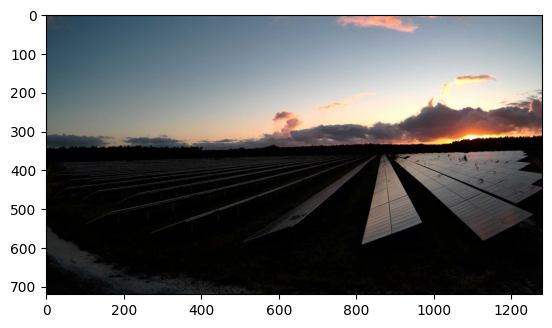

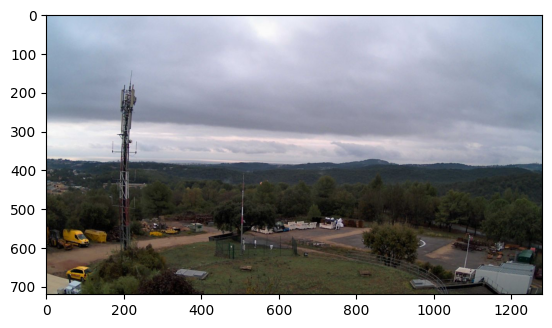

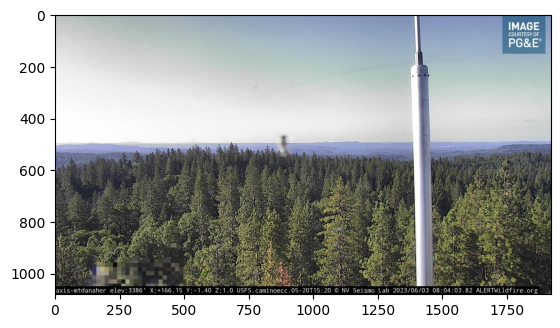

In [23]:

for img_path in np.random.choice(missing_labels_val,3):
    image = cv2.imread('DS-71c1fd51-v2/images/val/' + img_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

## random 4x4 grid of images with bounding boxes overlayed

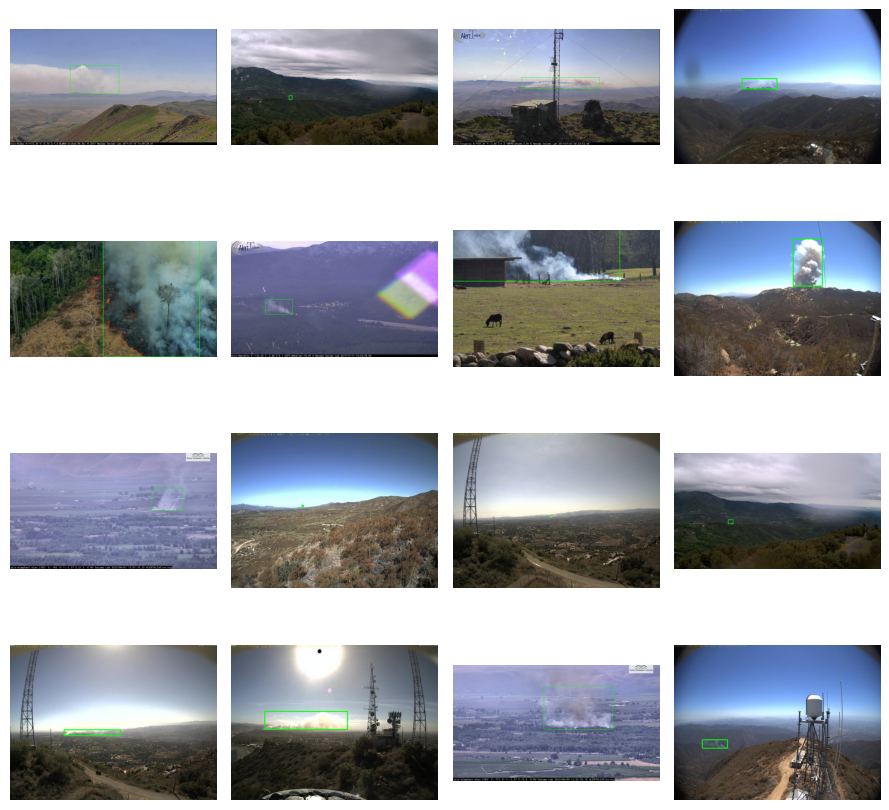

In [24]:
def display_4x4_random_mosaic(base_path,mode):

    if mode == 'train':
        img_paths = ALL_VALID_IMG_PATHS_TRAIN
    else:
        img_paths = ALL_VALID_IMG_PATHS_VAL

    img_paths = [base_path + p for p in img_paths]
    img_paths = np.random.choice(img_paths, 16)

    fig, axs = plt.subplots(4, 4, figsize=(9, 9))
    for i, img_path in enumerate(img_paths):
        ax = axs[i//4, i%4]

        sample_img = cv2.imread(img_path)
        label_path = get_label_path_from_img_path(img_path,mode)
        smoke_bboxes = []

        with open(label_path, 'r') as f:
            for line in f:
                line = line.replace('\n', '')
                class_id, x, y, w, h = line.split(' ')
                x, y, w, h = float(x), float(y), float(w), float(h)
                x, y = int(x * sample_img.shape[1]), int(y * sample_img.shape[0])
                w, h = int(w * sample_img.shape[1]), int(h * sample_img.shape[0])
                smoke_bboxes.append((x, y, w, h))
        for x, y, w, h in smoke_bboxes:
            half_w, half_h = w//2, h//2
            cv2.rectangle(sample_img, (x-half_w, y-half_h), (x+half_w, y+half_h), (0, 255, 0), 2)
        ax.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
        #disable axis
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
display_4x4_random_mosaic('DS-71c1fd51-v2/images/train/',mode='train')

For the validation set we do the same

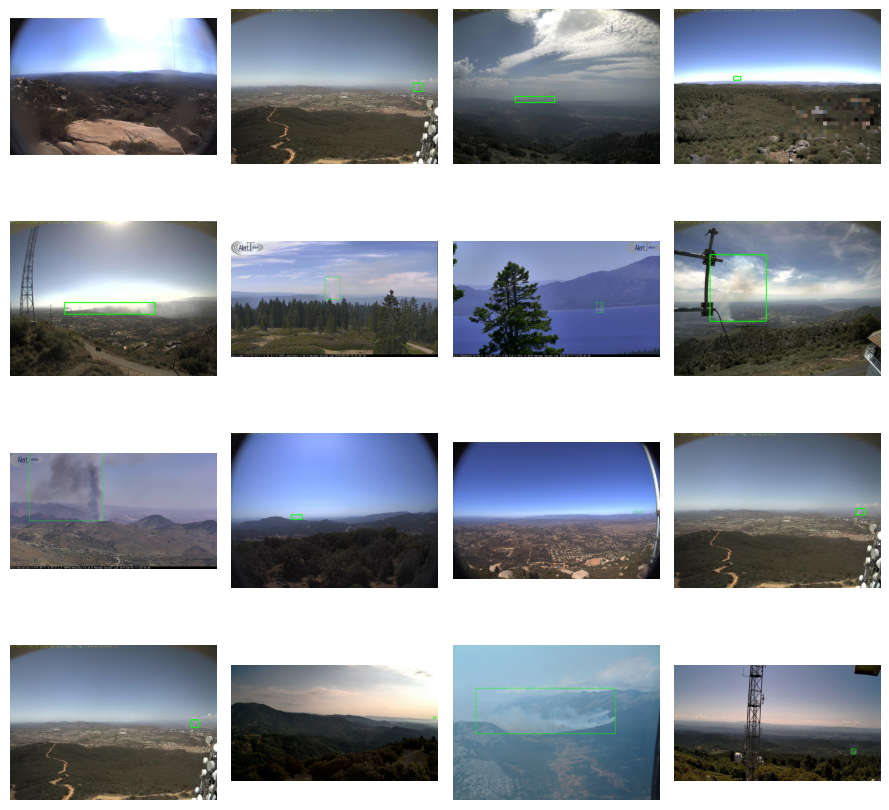

In [25]:
display_4x4_random_mosaic('DS-71c1fd51-v2/images/val/',mode='val')

## Statistics & outliers

The goal is to see how many bounding boxes we have per image

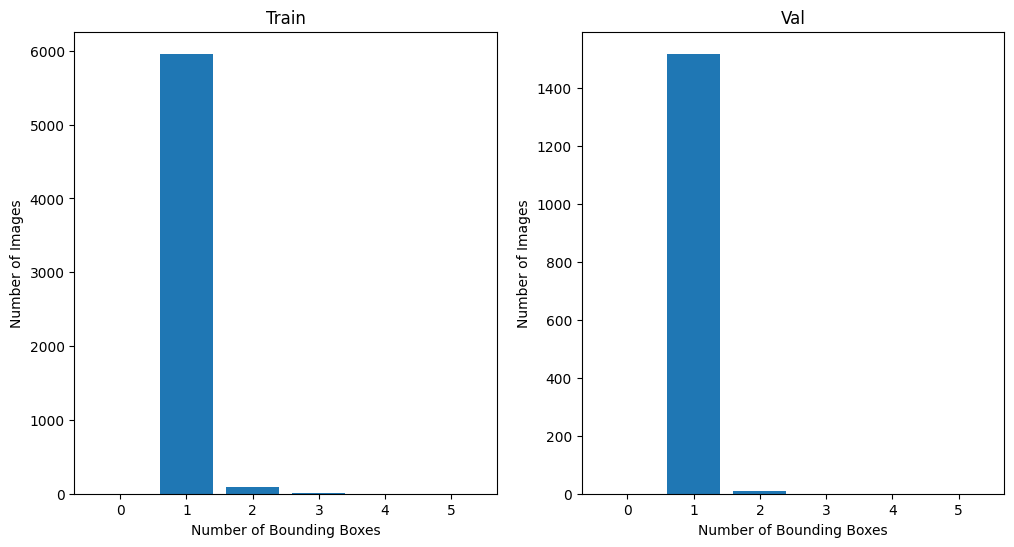

[0.00e+00 5.96e+03 8.60e+01 6.00e+00 0.00e+00 1.00e+00]
[   0. 1518.   11.    0.    0.    0.]


In [26]:


def count_bboxes_per_image(base_path,mode):
    if mode == 'train':
        img_paths = ALL_VALID_IMG_PATHS_TRAIN
    else:
        img_paths = ALL_VALID_IMG_PATHS_VAL

    count = np.zeros(6) # count[0] is total number of images with 0 bboxes, count[1] is total number of images with 1 bbox, etc.

    for img_path in img_paths:
        label_path = get_label_path_from_img_path(base_path + img_path,mode)
        with open(label_path, 'r') as f:
            num_bboxes = len(f.readlines())
            count[num_bboxes] += 1
    return count



#plot histogram for both train and val
train_count = count_bboxes_per_image('DS-71c1fd51-v2/images/train/',mode='train')
val_count = count_bboxes_per_image('DS-71c1fd51-v2/images/val/',mode='val')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].bar(range(6), train_count)
axs[0].set_title('Train')
axs[0].set_xlabel('Number of Bounding Boxes')
axs[0].set_ylabel('Number of Images')
axs[1].bar(range(6), val_count)
axs[1].set_title('Val')
axs[1].set_xlabel('Number of Bounding Boxes')
axs[1].set_ylabel('Number of Images')
plt.show()

print(train_count)
print(val_count)


The conclusion is that in the training set there is up to 5 bounding boxes in a single image. Most of the time though there is only 1 bounding box.

In the validation set there is never more than 2 bounding boxes in a single image.
Finally we can manually visualize the outlier below :

random_smoke_00000020.jpg


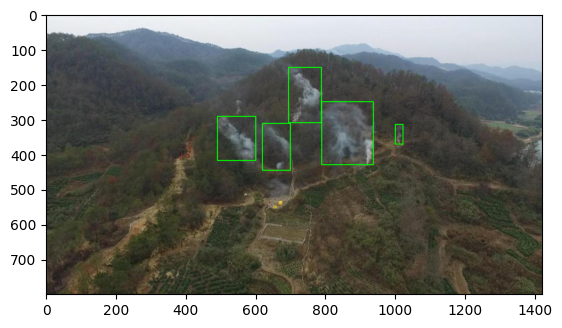

In [27]:
# visualize the outlier : the image with 5 bounding boxes

def display_outlier(base_path,mode):
    if mode == 'train':
        img_paths = ALL_VALID_IMG_PATHS_TRAIN
    else:
        img_paths = ALL_VALID_IMG_PATHS_VAL

    for img_path in img_paths:
        label_path = get_label_path_from_img_path(base_path + img_path,mode)
        with open(label_path, 'r') as f:
            num_bboxes = len(f.readlines())
        if num_bboxes == 5:
            print(img_path)
            image_with_bboxes(base_path + img_path,mode)
            break

display_outlier('DS-71c1fd51-v2/images/train/',mode='train')